# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()  

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [4]:
# Code

### How many countries are present?

In [5]:
df['country'].nunique()

219

###  What's the timespan of the data?

In [6]:
minimum = df['year'].min() 
maximum = df['year'].max()
print("The timespan is: ", minimum, "to", maximum)

The timespan is:  1980 to 2013


### Does each country have a row for every year present?

In [7]:
df.head()
df.groupby(['country'])['year'].nunique().sort_values()

country
South Sudan                           3
Curacao                               4
Bonaire, Saint Eustatius and Saba     4
Sint Maarten (Dutch part)             4
Serbia                                9
                                     ..
Greece                               34
Greenland                            34
Grenada                              34
Fiji                                 34
Zimbabwe                             34
Name: year, Length: 219, dtype: int64

In [8]:
z = pd.DataFrame(df.groupby(['country'])['year'].nunique().sort_values())

In [9]:
z[ z['year'] < 34]

,year
country,
South Sudan,3
Curacao,4
"Bonaire, Saint Eustatius and Saba",4
Sint Maarten (Dutch part),4
Serbia,9
Montenegro,9
Timor-Leste,12
Serbia & Montenegro,25
Netherlands Antilles,30


### Which countries are missing years?

In [10]:
z[ z['year'] < 34].index

Index(['South Sudan', 'Curacao', 'Bonaire, Saint Eustatius and Saba',
       'Sint Maarten (Dutch part)', 'Serbia', 'Montenegro', 'Timor-Leste',
       'Serbia & Montenegro', 'Netherlands Antilles'],
      dtype='object', name='country')

### How many rows have at least 1 non-null values across the columns 3-57?

In [11]:
df.iloc[:, 2:][~df.iloc[:, 2:].isnull().all(axis=1)]

# Reference = https://stackoverflow.com/questions/39050512/select-rows-where-at-least-one-value-from-the-list-of-columns-is-not-null

,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
17,0.0,10.0,6.0,3.0,5.0,2.0,0.0,5.0,38.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,30.0,129.0,128.0,90.0,89.0,64.0,41.0,45.0,350.0,419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,8.0,55.0,55.0,47.0,34.0,21.0,8.0,25.0,139.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,52.0,228.0,183.0,149.0,129.0,94.0,80.0,93.0,414.0,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,125.0,578.0,NaN,3471.0,681.0,293.0,192.0,180.0,873.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,150.0,710.0,2208.0,1682.0,761.0,350.0,252.0,173.0,974.0,2185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,152.0,784.0,2467.0,2071.0,780.0,377.0,278.0,174.0,1084.0,2161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,120.0,783.0,2421.0,2086.0,796.0,360.0,271.0,173.0,939.0,2053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [12]:
# Code
df = pd.melt(df, id_vars = ['country', 'year'], value_vars = df.columns[2:])

In [13]:
7240 * 56

405440

In [14]:
df

,country,year,variable,value
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
405435,Zimbabwe,2009,newrel_f65,NaN
405436,Zimbabwe,2010,newrel_f65,NaN
405437,Zimbabwe,2011,newrel_f65,NaN
405438,Zimbabwe,2012,newrel_f65,NaN


In [15]:
df['variable'].unique()

array(['new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544',
       'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_f014',
       'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554',
       'new_sp_f5564', 'new_sp_f65', 'new_sn_m014', 'new_sn_m1524',
       'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554', 'new_sn_m5564',
       'new_sn_m65', 'new_sn_f014', 'new_sn_f1524', 'new_sn_f2534',
       'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564', 'new_sn_f65',
       'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534', 'new_ep_m3544',
       'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65', 'new_ep_f014',
       'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544', 'new_ep_f4554',
       'new_ep_f5564', 'new_ep_f65', 'newrel_m014', 'newrel_m1524',
       'newrel_m2534', 'newrel_m3544', 'newrel_m4554', 'newrel_m5564',
       'newrel_m65', 'newrel_f014', 'newrel_f1524', 'newrel_f2534',
       'newrel_f3544', 'newrel_f4554', 'newrel_f5564', 'newrel_f65'],
      dtype=object)

In [16]:
df['diagnosis method'] = None

for i in range(df.shape[0]):
    s = df.iloc[i]['variable']
    
    if s.startswith('new_sp'):
        df.loc[i, 'diagnosis method'] = 'Pulmonary Smear (+)'
    elif s.startswith('new_sn'):
        df.loc[i, 'diagnosis method'] = 'Pulmonary Smear (-)'
    elif s.startswith('new_ep'):
        df.loc[i, 'diagnosis method'] = 'Extrapulmonary'
    else:
        df.loc[i, 'diagnosis method'] = 'Relapse'

In [17]:
df['gender'] = None

for i in range(df.shape[0]):
    s = df.iloc[i]['variable']
    
    if 'm' in s:
        df.loc[i, 'gender'] = 'male'
    else:
        df.loc[i, 'gender'] = 'female'

In [18]:
df['age'] = None

for i in range(df.shape[0]):
    s = df.iloc[i]['variable']
    
    if '0' in s:
        df.loc[i, 'age'] = '0-14'
    elif '65':
        df.loc[i, 'age'] = '65+'
    else:
        df.loc[i, 'age'] = s[-4:-2] + '-' + s[-2:]

In [42]:
df.rename(columns={"value": "number of cases"}, inplace = True)

In [19]:
df.drop('variable', axis = 1, inplace = True)

In [43]:
df

,country,year,number of cases,diagnosis method,gender,age
22948,Canada,1980,83.0,Pulmonary Smear (+),male,65+
30562,Cook Islands,1980,1.0,Pulmonary Smear (+),male,65+
37428,Canada,1980,108.0,Pulmonary Smear (+),male,65+
81242,Cook Islands,1980,1.0,Pulmonary Smear (+),female,65+
15708,Canada,1980,75.0,Pulmonary Smear (+),male,65+
...,...,...,...,...,...,...
405371,Yemen,2013,360.0,Relapse,female,65+
354283,United Arab Emirates,2013,10.0,Relapse,male,65+
405167,Uzbekistan,2013,1120.0,Relapse,female,65+
403958,Sierra Leone,2013,128.0,Relapse,female,65+


## Question 3: Create a graph that shows when countries started to report TB cases.

In [44]:
# Code
df = df.dropna()
df = df[ df['number of cases'] > 0]
df = df.sort_values(by = 'year')
data = df.drop_duplicates('country')[['country', 'year']]

(1980.0, 2015.0)

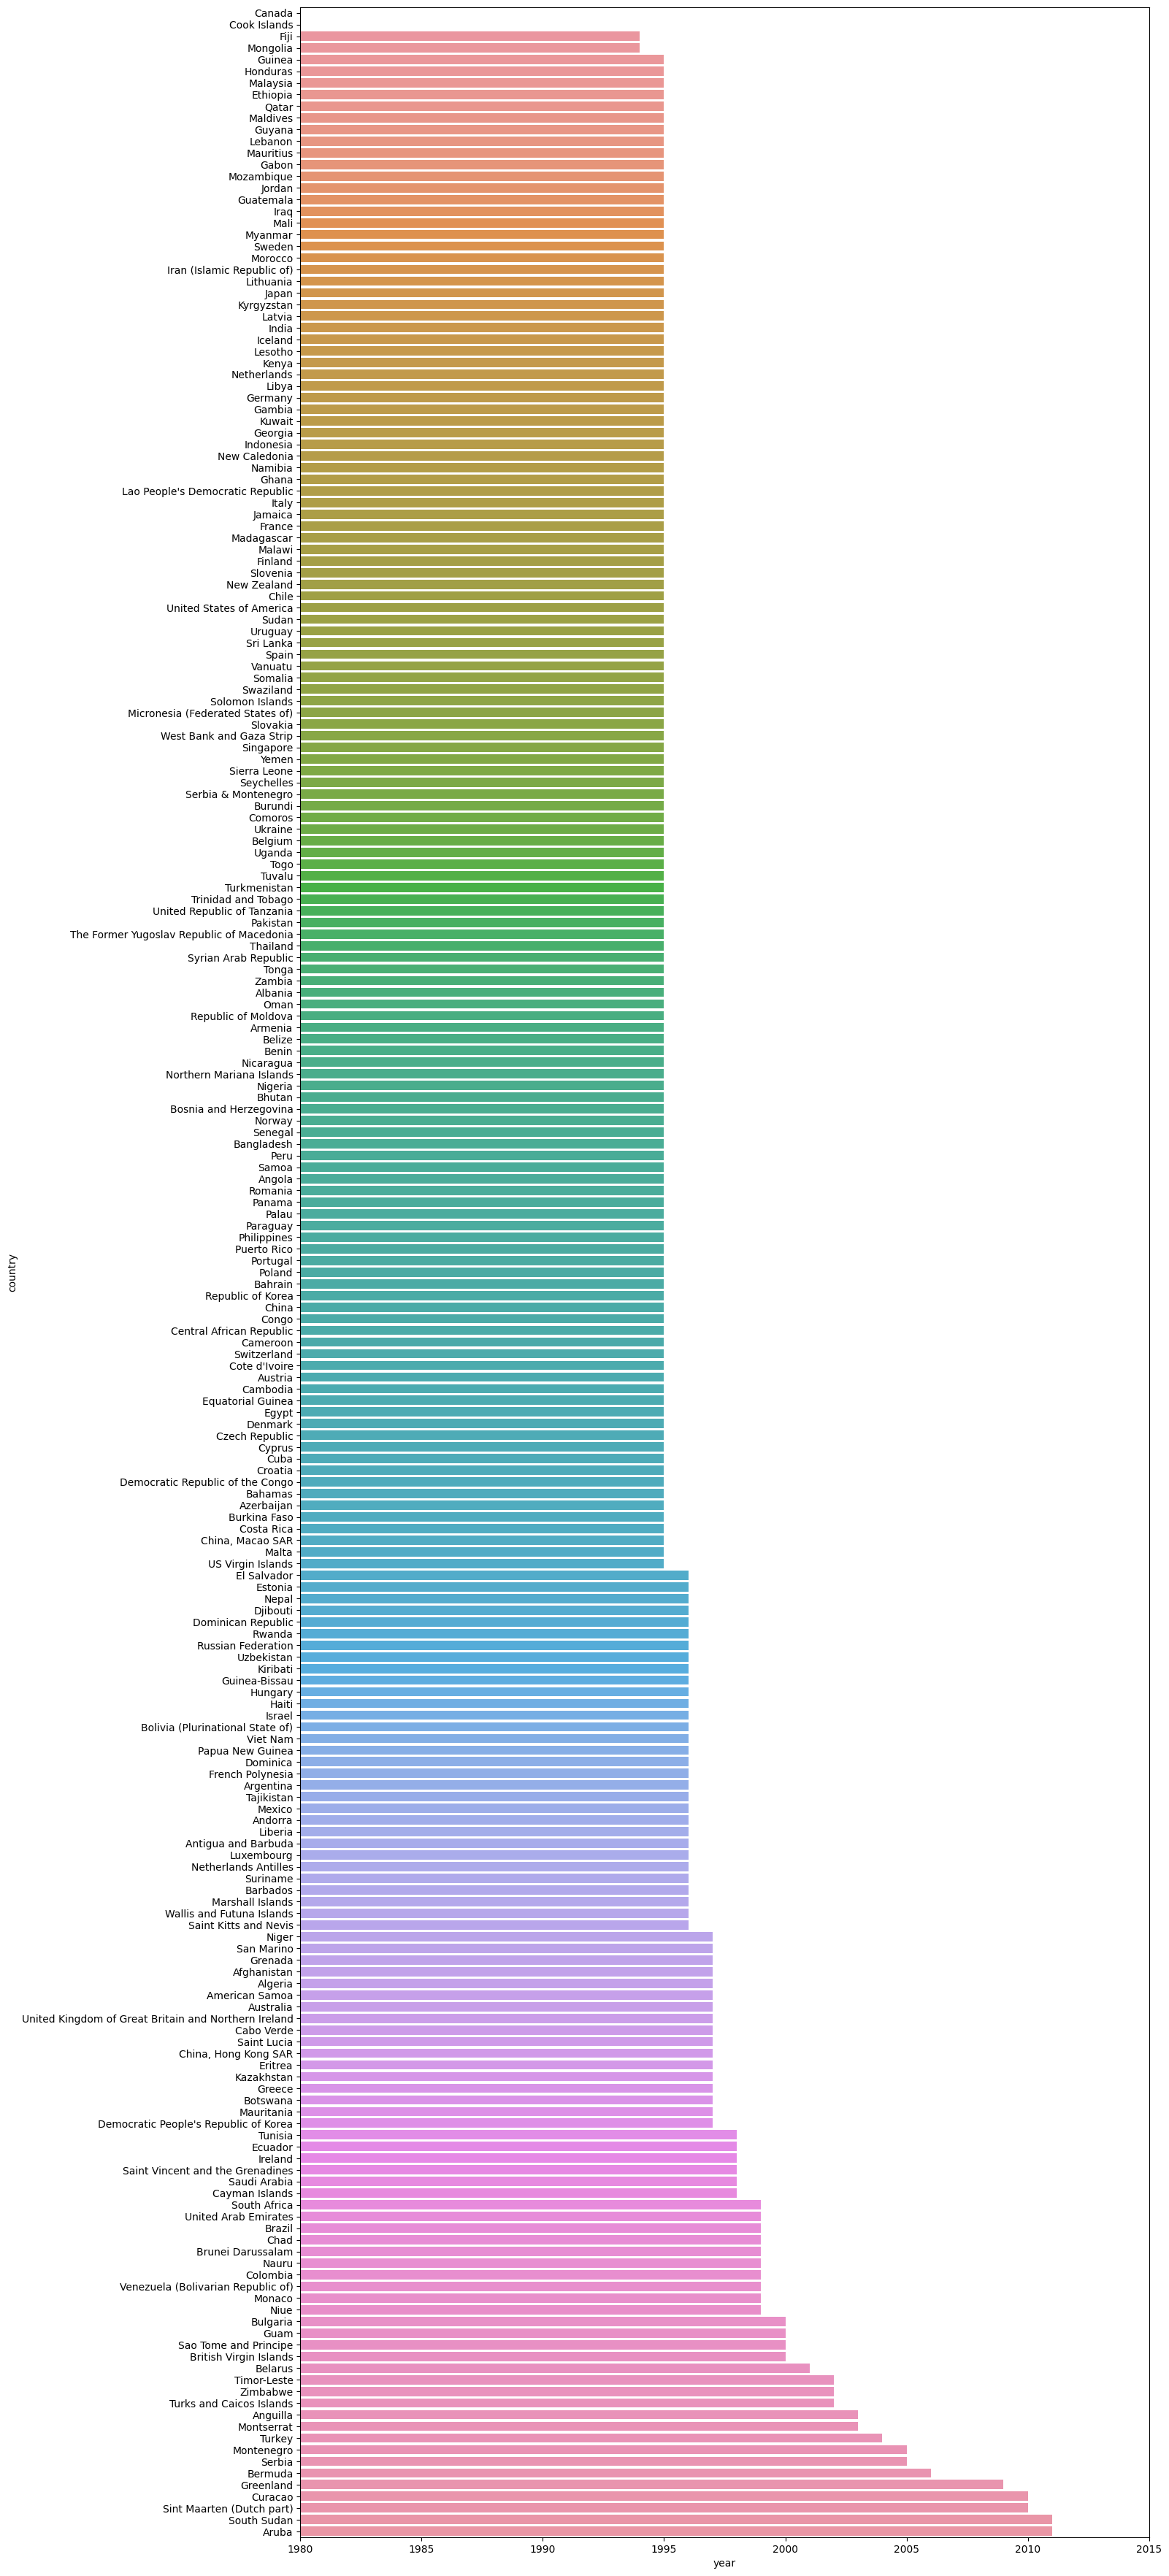

In [47]:
plt.figure(figsize = (15, 45))
x = sns.barplot(data = data, x = 'year', y = 'country')
plt.xlim(1980,2015)